# Project - Loan Default Prediction (EDA & Lojistic Regression, Bi-Class Classification)

### Problem 1: Conduct an EDA to enfer relation between different attributes, find dependecies and outhr useful insights.

### Problem 2: Make a machine learning model to predict if a person would be a loan defaulter or not. Explain, what factors makes a person a defaulter.

# Solution

### 1. Import necessary libraries and modules

In [488]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore") 

### 2. Import Your CSV file.

In [489]:
default = pd.read_csv("default.csv")

### 3. Do some basic analysis.

In [490]:
default.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Y,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y


In [491]:
default.shape

(614, 13)

In [492]:
default.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [493]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


### 3. Checking the missing values.

In [494]:
default.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### All the non categorical & numerical attributes with null values should be filled with mean, median, etc., if the proportion of missing values as compared to the rows are significant and can't be ignored.

#### "LoanAmount " has some missing values. But with what (Statistical method) it should be filled.

#### Let's check how it's distributed.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

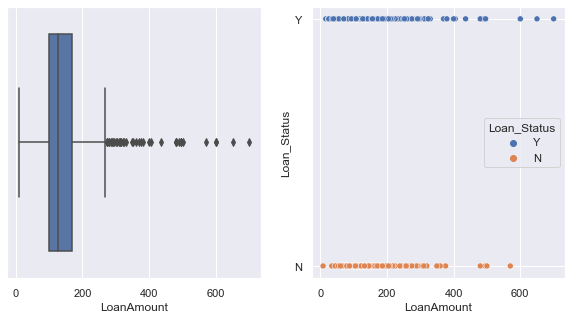

In [495]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)

plt.subplot(1,2,1)
sns.boxplot(default["LoanAmount"])

plt.subplot(1,2,2)
sns.scatterplot(default["LoanAmount"], default["Loan_Status"],hue=default["Loan_Status"])

#### The farthest outlier is very far away from the Q4 and thus affecting the mean, Therefore median could be used to represent the mid value in this case.

In [496]:
default["LoanAmount"] = default["LoanAmount"].fillna(default["LoanAmount"].median())

#### Now recheck if "LoanAmount " has no null values.

In [497]:
default.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Now drop all the records (rows/entries) with null/missing values, in order to make data even.  

In [498]:
default.dropna(inplace=True)

#### Now check that no column is left with null values.

In [499]:
default.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Now Check the Shape of the data set. You would see that some rows(with null values) has been dropped.

In [500]:
default.shape

(499, 13)

### 4. Do some EDA(if asked)

#### Do a comparision between different parameters Vs "Loan_Status", to get an idea which paraments are effecting the loan payment.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

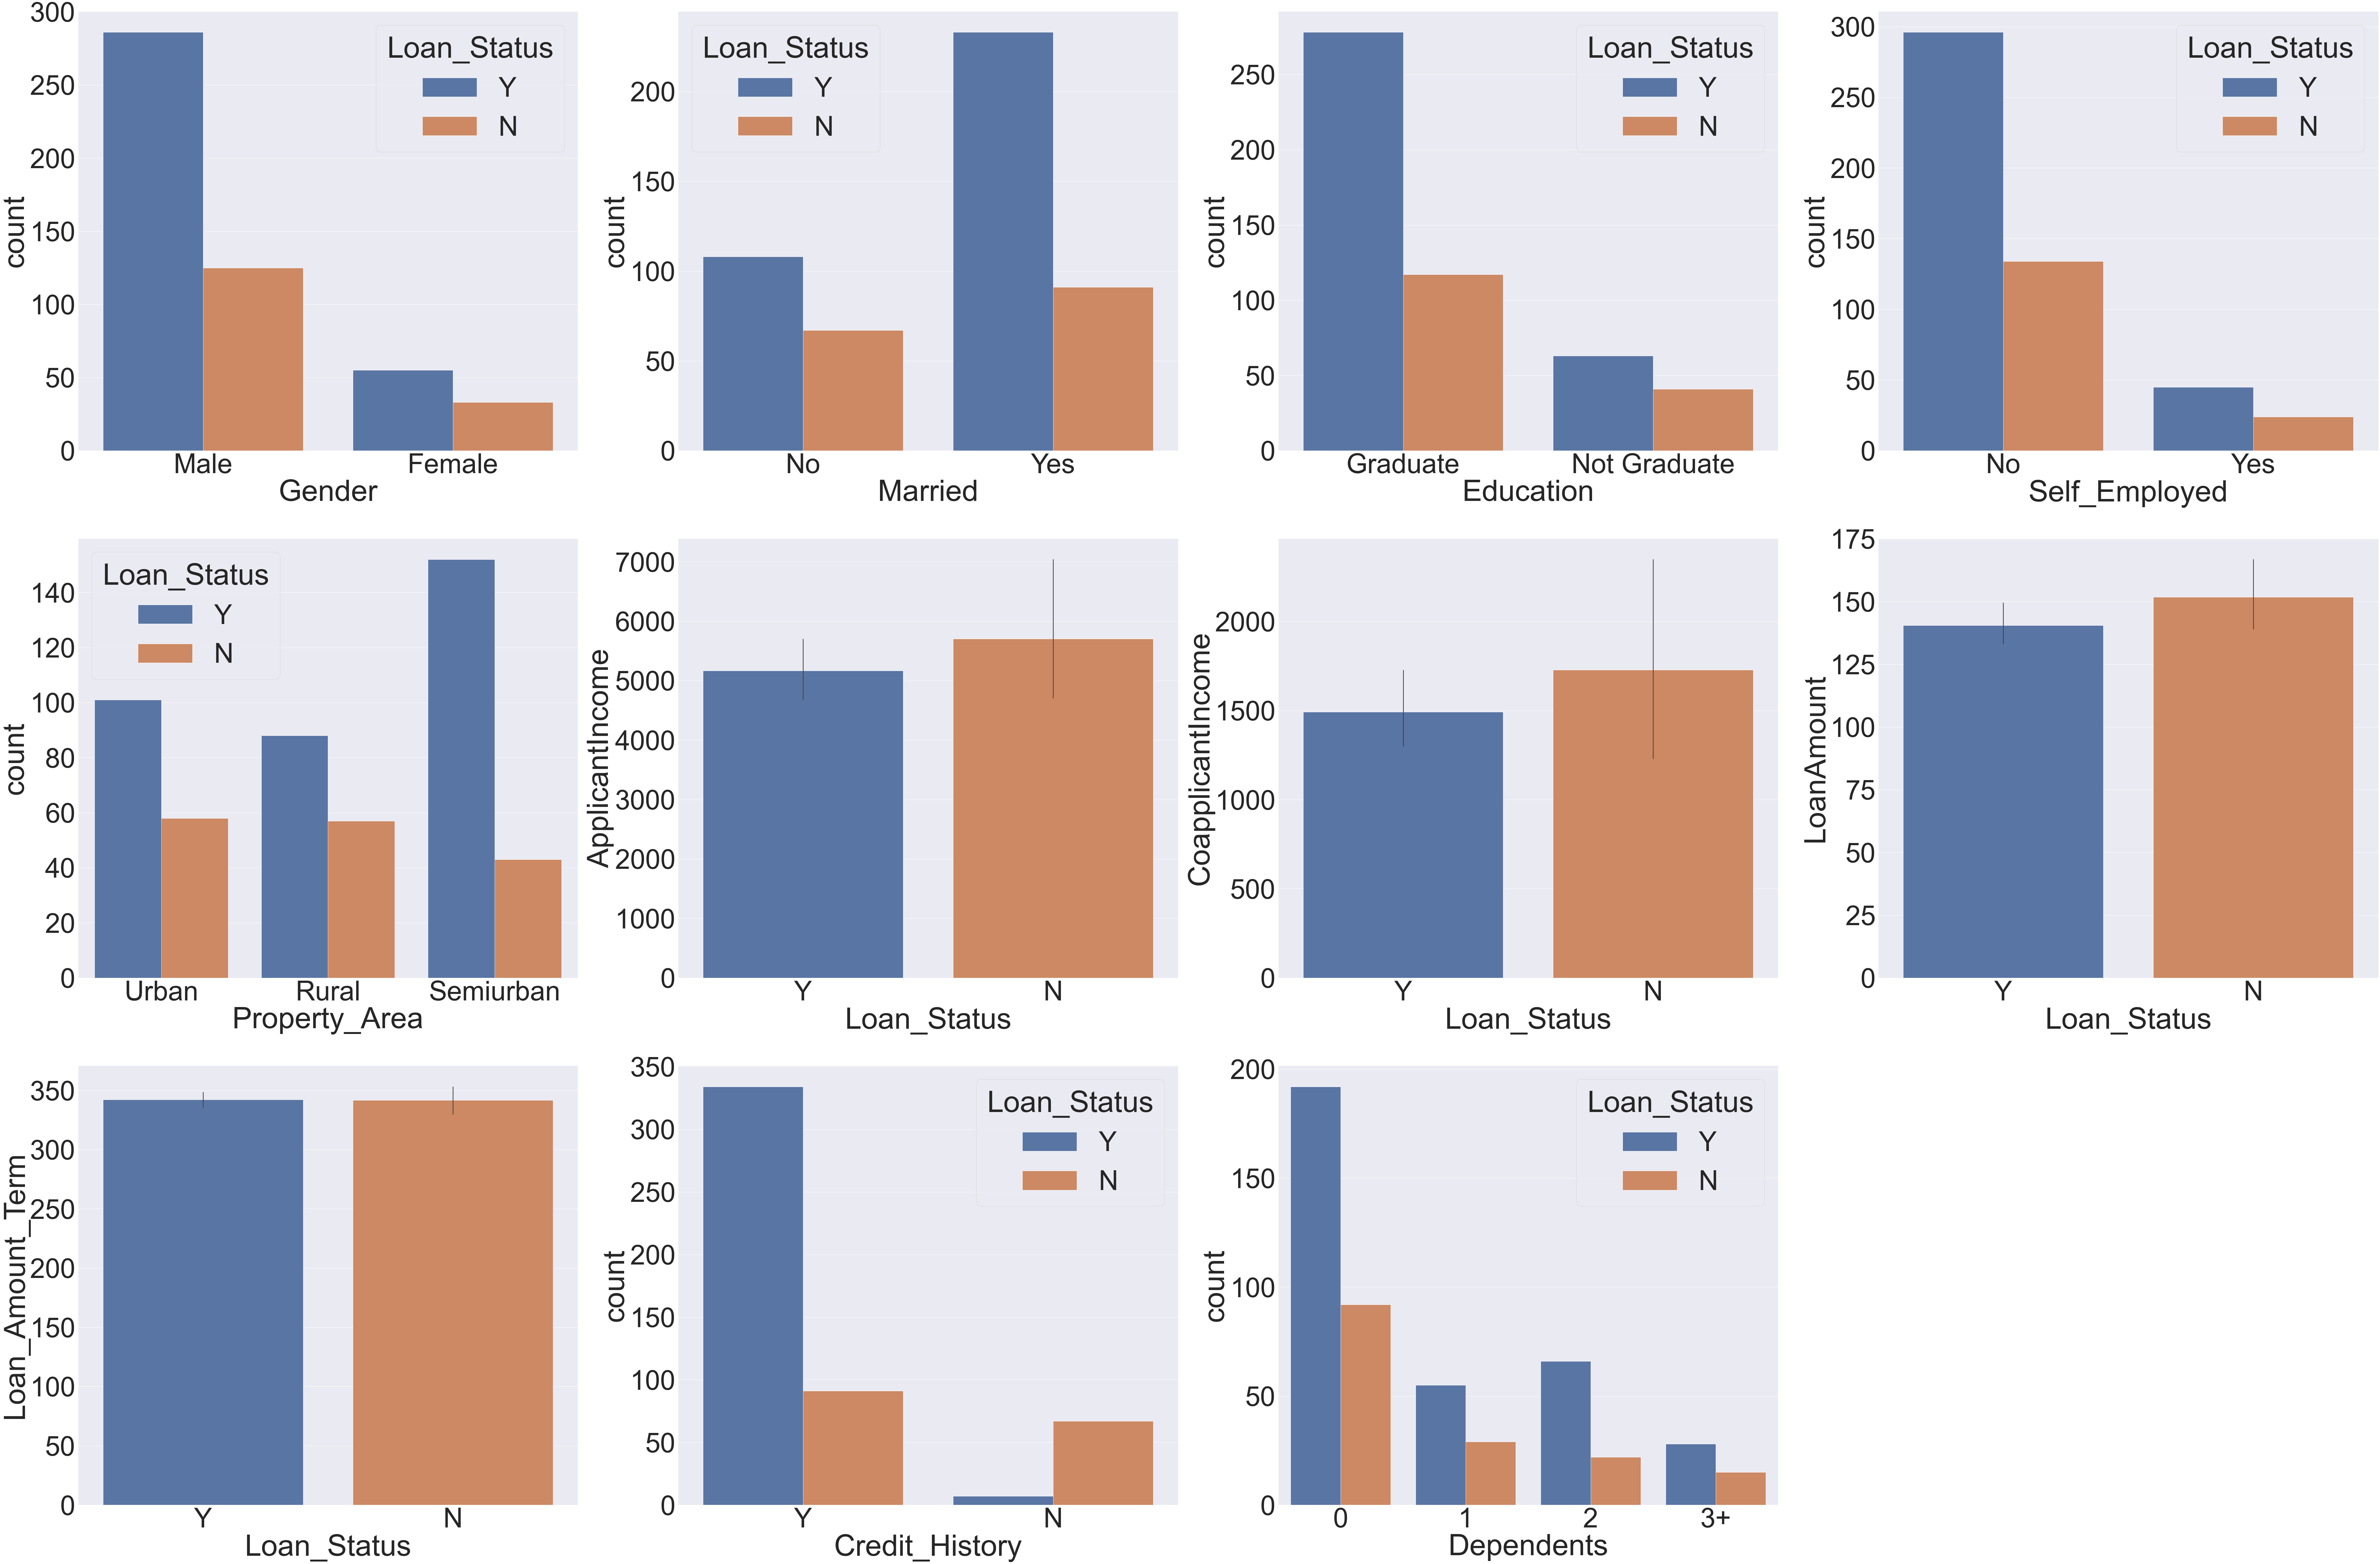

In [501]:
plt.figure(figsize=(150,100))
sns.set(font_scale = 9)

plt.subplot(3,4,1)
sns.countplot(default["Gender"],hue=default["Loan_Status"])

plt.subplot(3,4,2)
sns.countplot(default["Married"],hue=default["Loan_Status"])

plt.subplot(3,4,3)
sns.countplot(default["Education"],hue=default["Loan_Status"])


plt.subplot(3,4,4)
sns.countplot(default["Self_Employed"],hue=default["Loan_Status"])


plt.subplot(3,4,5)
sns.countplot(default["Property_Area"],hue=default["Loan_Status"])

plt.subplot(3,4,6)
sns.barplot(default["Loan_Status"],default["ApplicantIncome"])

plt.subplot(3,4,7)
sns.barplot(default["Loan_Status"],default["CoapplicantIncome"])

plt.subplot(3,4,8)
sns.barplot(default["Loan_Status"],default["LoanAmount"])

plt.subplot(3,4,9)
sns.barplot(default["Loan_Status"],default["Loan_Amount_Term"])

plt.subplot(3,4,10)
sns.countplot(default["Credit_History"],hue=default["Loan_Status"])

plt.subplot(3,4,11)
sns.countplot(default["Dependents"],hue=default["Loan_Status"])

#### There is an strong relationship between attributes like {"Gender", "Married", "Education", "Self_Employed", "Credit_History" and "Dependents"} Vs the dependent variable i.e., "Loan_Status". Therefore only these attributes will be used as independent variables. While rest of the attributes doesn't seem to have any strong relation with the dependent variable and therefore those will not be used as indipendent variable for training purpose.

### 5. Convert categorical values of independent and dependent variables into numerical values. 

#### We have "Gender","Married","Education","Self_Employed", "Credit_History", "Dependents" and "Loan_Status", with categorical values.

In [502]:
default["Loan_Status"].value_counts()

Y    341
N    158
Name: Loan_Status, dtype: int64

In [503]:
default["Gender"].value_counts()

Male      411
Female     88
Name: Gender, dtype: int64

In [504]:
default["Married"].value_counts()

Yes    324
No     175
Name: Married, dtype: int64

In [505]:
default["Dependents"].value_counts()

0     284
2      88
1      84
3+     43
Name: Dependents, dtype: int64

In [506]:
default["Education"].value_counts()

Graduate        395
Not Graduate    104
Name: Education, dtype: int64

In [507]:
default["Self_Employed"].value_counts()

No     430
Yes     69
Name: Self_Employed, dtype: int64

In [508]:
default["Credit_History"].value_counts()

Y    425
N     74
Name: Credit_History, dtype: int64

#### Now Change the categorical values into numerical values.

In [509]:
default.Gender=default.Gender.map({"Male":1,"Female":0})
default["Gender"].value_counts()

1    411
0     88
Name: Gender, dtype: int64

In [510]:
default.Married=default.Married.map({"Yes":1,"No":0})
default["Married"].value_counts()

1    324
0    175
Name: Married, dtype: int64

In [511]:
default.Dependents=default.Dependents.map({"0":0,"1":1,"2":2,"3+":3})
default["Dependents"].value_counts()

0    284
2     88
1     84
3     43
Name: Dependents, dtype: int64

In [512]:
default.Education=default.Education.map({"Graduate":1,"Not Graduate":0})
default["Education"].value_counts()

1    395
0    104
Name: Education, dtype: int64

In [513]:
default.Self_Employed=default.Self_Employed.map({"Yes":1,"No":0})
default["Self_Employed"].value_counts()

0    430
1     69
Name: Self_Employed, dtype: int64

In [514]:
default.Loan_Status=default.Loan_Status.map({"Y":1,"N":0})
default["Loan_Status"].value_counts()

1    341
0    158
Name: Loan_Status, dtype: int64

In [515]:
default.Credit_History=default.Credit_History.map({"Y":1,"N":0})
default["Credit_History"].value_counts()

1    425
0     74
Name: Credit_History, dtype: int64

#### Chaeck if categorical values have changes into numerical values or not.

In [516]:
default.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,Urban,1


### 6. Check outliers for Independent variables.

#### As our all independent variables are categorical/calss/levels. Therefore there could not be outliers in them. But suppose we would take "ApplicantIncome", "CoapplicantIncome","LoanAmount" and "Loan_Amount_Term" as our independent variable. So in that case the independent variable would not be categorical and they would be numerical with ranges, and then they would surely have outliers which would require a normalization. The steps would go as follows.

In [517]:
'''
#1. Check Outliers with box plot to get a visual idea.

plt.figure(figsize=(100,50))
sns.set(font_scale = 5)

plt.subplot(2,3,1)
sns.boxplot(default["Loan_Status"],default["ApplicantIncome"])

plt.subplot(2,3,2)
sns.boxplot(default["Loan_Status"],default["CoapplicantIncome"])

plt.subplot(2,3,3)
sns.boxplot(default["Loan_Status"],default["LoanAmount"])

plt.subplot(2,3,4)
sns.boxplot(default["Loan_Status"],default["Loan_Amount_Term"])


#We can See clearly that there are outliers. We need to Normalize it with IQR.

#7. Normalize with IQR

# Normalize Applicantincome
Q1, Q3 = default["ApplicantIncome"].quantile([.25, .75])
IQR = Q3-Q1
LL = Q1-1.5*(IQR)
UL = Q3+1.5*(IQR)
UL #UL is 10234.25

#Make a Data Frame which has all the rows where ApplicanIncome is > UL.
df = default[default["ApplicantIncome"]>UL]
df
df["Loan_Status"].count() #Answer is 41.
df["Loan_Status"].value_counts(normalize=True) # Around 60% from the df data frame has laon status = Yes/1
df["Loan_Status"].value_counts() # 25 for Yes/1 and 16 for No/0
default["Loan_Status"].value_counts() # 341 for Yes/1 and 158 for No/0.
# This means that there are 25 out of 341 individuals who has ApplicanIncome > UL and their loan status is yes(1). So the outliers number is more and can't be simply removed. We will make all the outliers = UL.

default["ApplicantIncome"] = np.where(default["ApplicantIncome"] > UL, UL, default["ApplicantIncome"])
#Check with a box plot if the outliers are gone or not.
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)

sns.boxplot(y=default["ApplicantIncome"])
plt.show()

#Yes, Outliers have been removed
#Now check outliers for CoapplicantIncome, LoanAmount and Loan_Amount_Term and do the same for them to normalize/remove/submerge the outliers.

'''

'\n#1. Check Outliers with box plot to get a visual idea.\n\nplt.figure(figsize=(100,50))\nsns.set(font_scale = 5)\n\nplt.subplot(2,3,1)\nsns.boxplot(default["Loan_Status"],default["ApplicantIncome"])\n\nplt.subplot(2,3,2)\nsns.boxplot(default["Loan_Status"],default["CoapplicantIncome"])\n\nplt.subplot(2,3,3)\nsns.boxplot(default["Loan_Status"],default["LoanAmount"])\n\nplt.subplot(2,3,4)\nsns.boxplot(default["Loan_Status"],default["Loan_Amount_Term"])\n\n\n#We can See clearly that there are outliers. We need to Normalize it with IQR.\n\n#7. Normalize with IQR\n\n# Normalize Applicantincome\nQ1, Q3 = default["ApplicantIncome"].quantile([.25, .75])\nIQR = Q3-Q1\nLL = Q1-1.5*(IQR)\nUL = Q3+1.5*(IQR)\nUL #UL is 10234.25\n\n#Make a Data Frame which has all the rows where ApplicanIncome is > UL.\ndf = default[default["ApplicantIncome"]>UL]\ndf\ndf["Loan_Status"].count() #Answer is 41.\ndf["Loan_Status"].value_counts(normalize=True) # Around 60% from the df data frame has laon status = Yes/1

### 8. Apply Logistic Regression

In [542]:
from sklearn.model_selection import train_test_split

In [543]:
#Drop the column "Loan_Id", as it is of no significance.
default2 = default.drop("Loan_ID", axis=1)

In [544]:
default2.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1,Urban,1


In [572]:
x=default2[["Gender","Married", "Dependents","Education","Self_Employed","Credit_History"]]
y=default2["Loan_Status"]

In [573]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

In [574]:
print(x_train.shape)
print(x_test.shape)

(349, 6)
(150, 6)


In [575]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

1    0.68
0    0.32
Name: Loan_Status, dtype: float64
 
1    0.69
0    0.31
Name: Loan_Status, dtype: float64


### 9 .Now Banlance With SMOTE (If required)

#### Since in real life data the categories/levels are imbalanced, we will use SMOTE (Synthetic Monority Oversampling Technique). like here it is 69% Vs 31%. it's not much imbalanced but still SMOTE can be used to set desired percentage of categories/levels.

In [576]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [577]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy=0.75)
x_resamp,y_resamp = sm.fit_sample(x_train,y_train)

In [578]:
from sklearn.linear_model import LogisticRegression

In [579]:
lr = LogisticRegression()

In [580]:
lr.fit(x_resamp,y_resamp)

LogisticRegression()

In [581]:
y_pred = lr.predict(x_test)

In [582]:
from sklearn.metrics import confusion_matrix,classification_report

In [583]:
confusion_matrix(y_test,y_pred)

array([[ 15,  32],
       [  1, 102]], dtype=int64)

In [584]:
accuracy = (15+102)/(15+102+32+1)

In [585]:
accuracy

0.78

#### The model is 78% accurate. 